In [27]:
# Calling all the libraries that we are going to use here #
library(rpart)
library(rpart.plot)
library(e1071)

In [1]:
###===Importing Data-Set===###
realestate<-read.csv("F:\\melb.realstate.all.files\\OutputDataSets\\realestate.derived.without.year.csv", header = T, stringsAsFactors = T, strip.white = T, sep = ',')
str(realestate)

'data.frame':	8220 obs. of  22 variables:
 $ Suburb      : Factor w/ 140 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address     : Factor w/ 8124 levels "1 Adelle Ct",..: 7764 3582 6068 5515 6523 1246 1213 8093 3199 656 ...
 $ Rooms       : int  2 2 3 3 4 2 3 2 3 2 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1480000 1035000 1465000 850000 1600000 941000 1876000 1636000 1000000 1097000 ...
 $ Method      : Factor w/ 5 levels "PI","S","SA",..: 2 2 4 1 5 2 2 2 2 2 ...
 $ SellerG     : Factor w/ 178 levels "Abercromby's",..: 18 18 18 18 111 83 111 111 83 18 ...
 $ Date        : Factor w/ 42 levels "03-09-16","03-12-16",..: 2 3 4 4 5 8 8 11 11 11 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 2 3 3 3 2 4 2 3 3 ...
 $ Bathroom    : int  1 1 2 2 1 1 2 1 1 1 ...
 $ Car         : int  1 0 0 1 2 0 0 2

In [2]:
#== Converting cont data into cate ==##
realestate$Postcode<-as.factor(realestate$Postcode)
realestate$Rooms<-as.factor(realestate$Rooms)
realestate$Bedroom2<-as.factor(realestate$Bedroom2)
realestate$Bathroom<-as.factor(realestate$Bathroom)
realestate$Car<-as.factor(realestate$Car)
realestate$Type<-as.factor(realestate$Type)


In [4]:
## Creating new data set for SVM #####

realestate.svm<- realestate[-c(2,8,17,18,20,22)]
str(realestate.svm)

'data.frame':	8220 obs. of  16 variables:
 $ Suburb      : Factor w/ 140 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Rooms       : Factor w/ 8 levels "1","2","3","4",..: 2 2 3 3 4 2 3 2 3 2 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : int  1480000 1035000 1465000 850000 1600000 941000 1876000 1636000 1000000 1097000 ...
 $ Method      : Factor w/ 5 levels "PI","S","SA",..: 2 2 4 1 5 2 2 2 2 2 ...
 $ SellerG     : Factor w/ 178 levels "Abercromby's",..: 18 18 18 18 111 83 111 111 83 18 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : Factor w/ 92 levels "3000","3002",..: 38 38 38 38 38 38 38 38 38 38 ...
 $ Bedroom2    : Factor w/ 11 levels "0","1","2","3",..: 3 3 4 4 4 3 5 3 4 4 ...
 $ Bathroom    : Factor w/ 9 levels "0","1","2","3",..: 2 2 3 3 2 2 3 2 2 2 ...
 $ Car         : Factor w/ 9 levels "0","1","2","3",..: 2 1 1 2 3 1 1 3 2 3 ...
 $ Landsize    : num  202 156 134 94 120 

In [28]:
#rpart.plot(tree, box.palette="RdBu", shadow.col="gray", nn=TRUE)

ERROR: Error in rpart.plot(tree, box.palette = "RdBu", shadow.col = "gray", nn = TRUE): object 'tree' not found



Call:
svm(formula = Type ~ ., data = realestate.svm, type = "C-classification", 
    kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.002118644 
     coef.0:  0 

Number of Support Vectors:  2996

 ( 1405 679 912 )


Number of Classes:  3 

Levels: 
 1 2 3




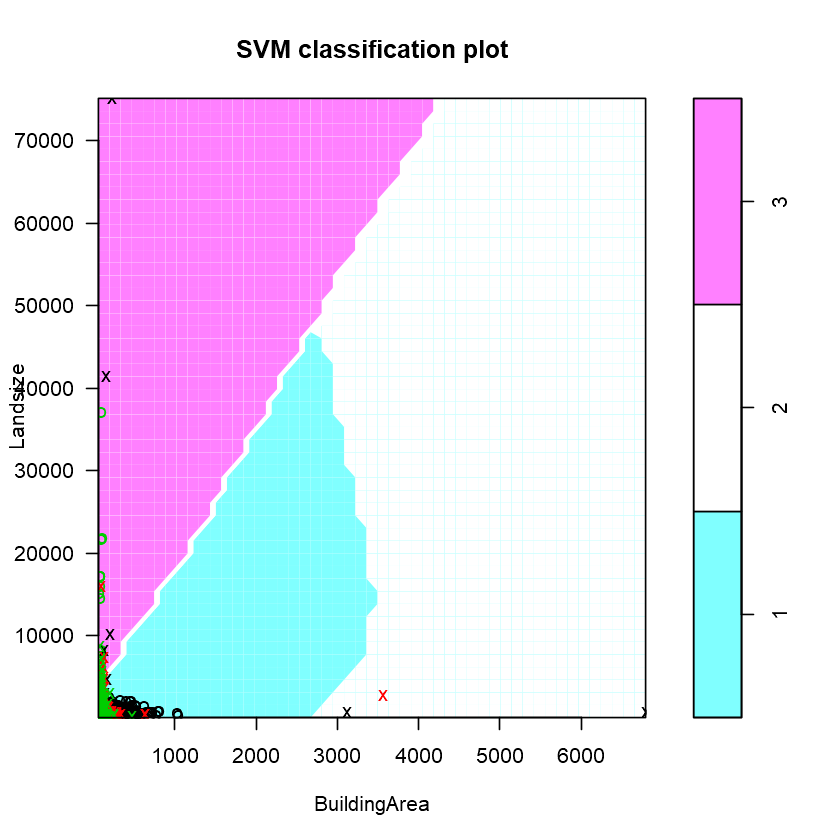

In [11]:
# Performing SVM on realestate data #

## On Type ##
levels(realestate.svm$Type)<-c(1:3) # h = 1, t = 2, u = 3

fit1 = svm(Type ~ ., data=realestate.svm, type='C-classification', kernel='sigmoid')
summary(fit1)
## Plotiing the SVM of Type with Landsize and BuildingArea #
plot(fit1, realestate.svm, Landsize~BuildingArea)

In [12]:
# Preparing data for SVM on Price Bucket #
realestate.svm.noprice<-realestate.svm[,-4] #removing price from Dataset
levels(realestate.svm.noprice$Price.bucket)<-c(1:5) # <4L = 1, >25L = 2, 16L-25L = 3, 4L-8L = 4, 8L-16L = 5


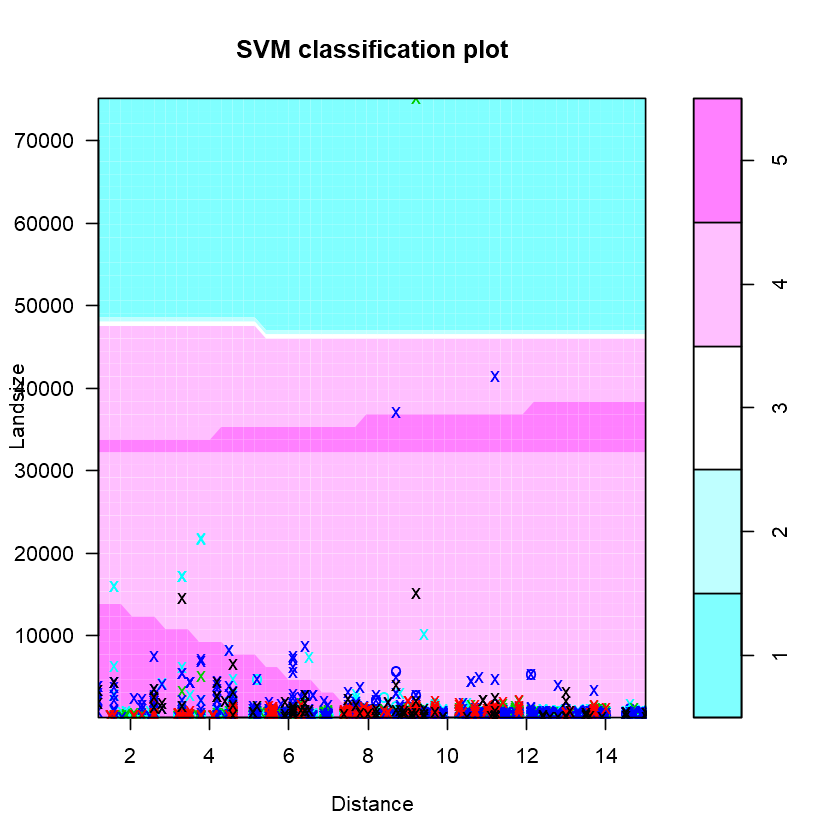

In [13]:
## SVM on Price Bucket ##

fit = svm(Price.bucket ~ ., data=realestate.svm.noprice, 
          type='C-classification', kernel='sigmoid')

summary(fit)
## Plotiing the SVM of Price Bucket with Landsize and Distance #
plot(fit, realestate.svm.noprice, Landsize~Distance)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon cost
       0  128

- best performance: 0.1069343 

- Detailed performance results:
   epsilon cost     error dispersion
1      0.0    2 0.1326034 0.02054965
2      0.1    2 0.1326034 0.02054965
3      0.2    2 0.1326034 0.02054965
4      0.3    2 0.1326034 0.02054965
5      0.4    2 0.1326034 0.02054965
6      0.5    2 0.1326034 0.02054965
7      0.6    2 0.1326034 0.02054965
8      0.7    2 0.1326034 0.02054965
9      0.8    2 0.1326034 0.02054965
10     0.9    2 0.1326034 0.02054965
11     1.0    2 0.1326034 0.02054965
12     0.0    4 0.1236010 0.01743432
13     0.1    4 0.1236010 0.01743432
14     0.2    4 0.1236010 0.01743432
15     0.3    4 0.1236010 0.01743432
16     0.4    4 0.1236010 0.01743432
17     0.5    4 0.1236010 0.01743432
18     0.6    4 0.1236010 0.01743432
19     0.7    4 0.1236010 0.01743432
20     0.8    4 0.1236010 0.01743432
21     0.9    4 0.1236010 0.01743432

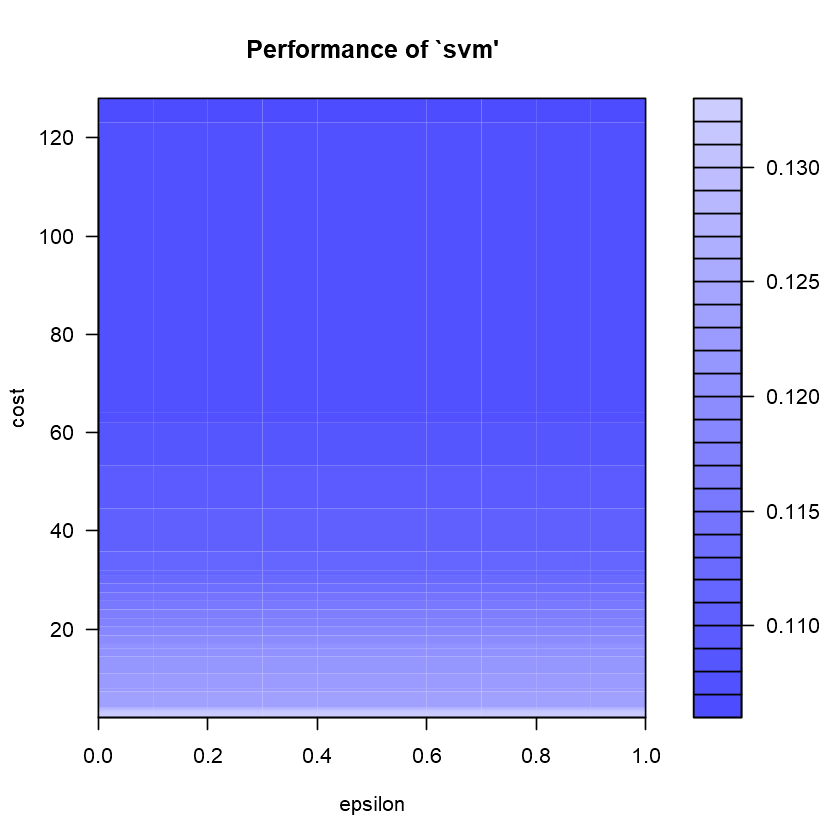

In [14]:
# Tuning on Type #

set.seed(23)
tune.type<-tune(svm,Type ~ ., data=realestate.svm,kernel='sigmoid', ranges = list(epsilon=seq(0,1,0.1),cost=2^c(1:7)))
plot(tune.type)
summary(tune.type)


In [18]:
best.svm.type<-tune.type$best.model
summary(best.svm.type)


Call:
best.tune(method = svm, train.x = Type ~ ., data = realestate.svm, 
    ranges = list(epsilon = seq(0, 1, 0.1), cost = 2^c(1:7)), kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  128 
      gamma:  0.002118644 
     coef.0:  0 

Number of Support Vectors:  1894

 ( 824 613 457 )


Number of Classes:  3 

Levels: 
 1 2 3




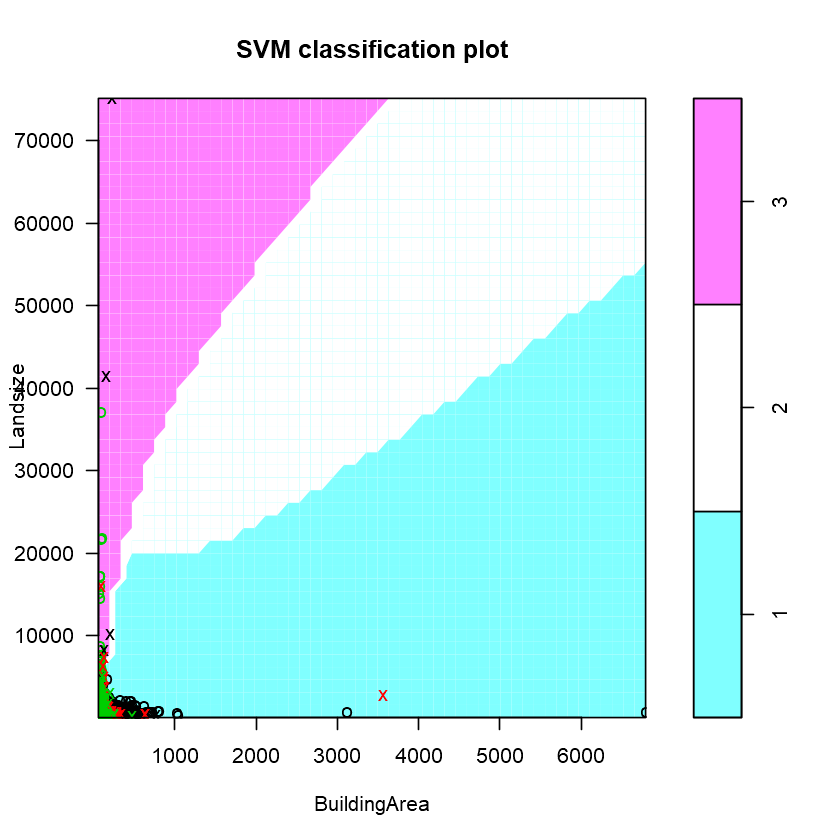

In [19]:
plot(best.svm.type,data=realestate.svm,Landsize~BuildingArea)#,slice=list(Landsize=55000,BuildingArea=4000))


In [20]:
names(realestate.svm)
x<-realestate.svm[,-3]
y<-realestate.svm$Type

[1] "Suburb"       "Rooms"        "Type"         "Price"        "Method"      
 [6] "SellerG"      "Distance"     "Postcode"     "Bedroom2"     "Bathroom"    
[11] "Car"          "Landsize"     "BuildingArea" "CouncilArea"  "Days.diff"   
[16] "Price.bucket"

In [21]:
pred<-predict(best.svm.type,x)
InformationValue::confusionMatrix(y,pred)

Warning message in Ops.factor(predictedScores, threshold):
"'<' not meaningful for factors"

1,2,3


In [16]:
# Tunning on Price Bucket #
set.seed(23)

In [17]:

tune.Price<-tune(svm,Price.bucket ~ ., data=realestate.svm.noprice,kernel='sigmoid', ranges = list(epsilon=seq(0,1,0.1),cost=2^c(1:7)))



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 epsilon cost
       0  128

- best performance: 0.2636253 

- Detailed performance results:
   epsilon cost     error dispersion
1      0.0    2 0.3402676 0.01982508
2      0.1    2 0.3402676 0.01982508
3      0.2    2 0.3402676 0.01982508
4      0.3    2 0.3402676 0.01982508
5      0.4    2 0.3402676 0.01982508
6      0.5    2 0.3402676 0.01982508
7      0.6    2 0.3402676 0.01982508
8      0.7    2 0.3402676 0.01982508
9      0.8    2 0.3402676 0.01982508
10     0.9    2 0.3402676 0.01982508
11     1.0    2 0.3402676 0.01982508
12     0.0    4 0.3128954 0.01616780
13     0.1    4 0.3128954 0.01616780
14     0.2    4 0.3128954 0.01616780
15     0.3    4 0.3128954 0.01616780
16     0.4    4 0.3128954 0.01616780
17     0.5    4 0.3128954 0.01616780
18     0.6    4 0.3128954 0.01616780
19     0.7    4 0.3128954 0.01616780
20     0.8    4 0.3128954 0.01616780
21     0.9    4 0.3128954 0.01616780

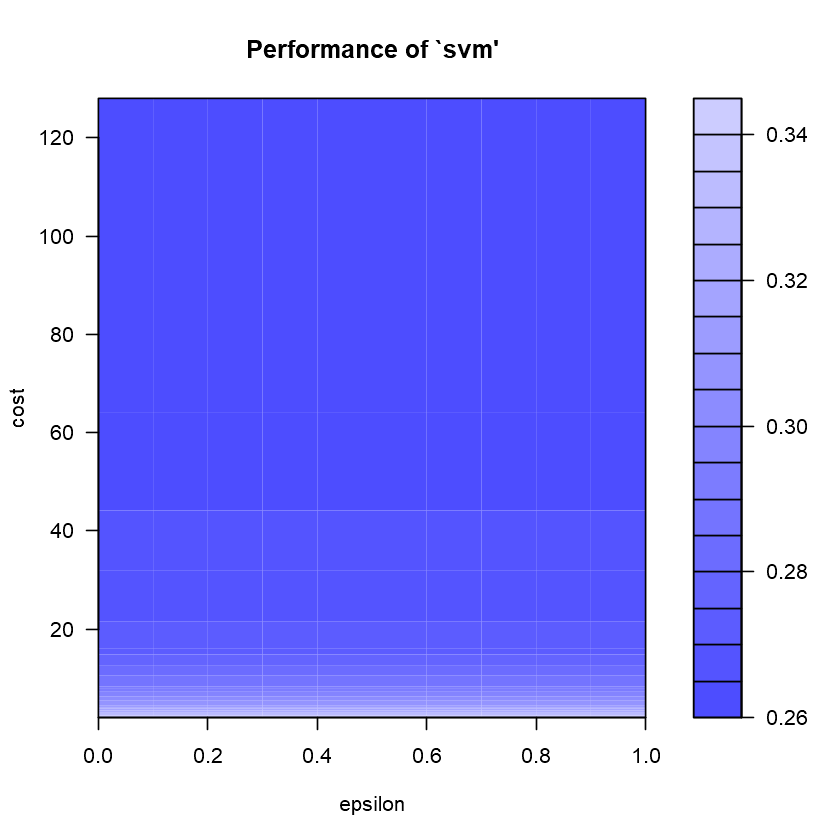

In [22]:
plot(tune.Price)
summary(tune.Price)

In [23]:
best.svm.Price<-tune.Price$best.model
summary(best.svm.Price)


Call:
best.tune(method = svm, train.x = Price.bucket ~ ., data = realestate.svm.noprice, 
    ranges = list(epsilon = seq(0, 1, 0.1), cost = 2^c(1:7)), kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  128 
      gamma:  0.002132196 
     coef.0:  0 

Number of Support Vectors:  4682

 ( 1942 1081 1188 356 115 )


Number of Classes:  5 

Levels: 
 1 2 3 4 5




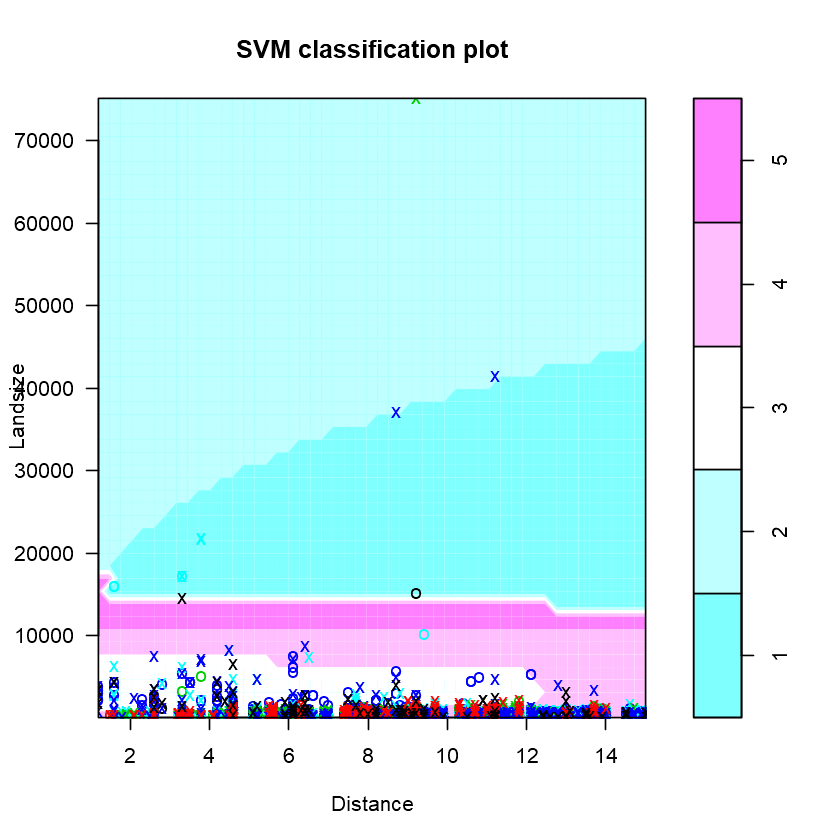

In [24]:
plot(best.svm.Price, data=realestate.svm.noprice, Landsize~Distance)#,slice=list(Landsize=50000,BuildingArea=4000))


In [25]:
names(realestate.svm.noprice)
x1<-realestate.svm.noprice[,-15]
y1<-realestate.svm.noprice$Price.bucket

[1] "Suburb"       "Rooms"        "Type"         "Method"       "SellerG"     
 [6] "Distance"     "Postcode"     "Bedroom2"     "Bathroom"     "Car"         
[11] "Landsize"     "BuildingArea" "CouncilArea"  "Days.diff"    "Price.bucket"

In [26]:
pred1<-predict(best.svm.Price,x1)
InformationValue::confusionMatrix(y1,pred1)

Warning message in Ops.factor(predictedScores, threshold):
"'<' not meaningful for factors"

1,2,3,4,5
